In [134]:
import pandas as pd
import matplotlib.pyplot as plt

Membaca file DataFrame.csv

In [135]:
lr = pd.read_csv(r'D:\temp\tubes2\harvardnobeldata\laureate.csv')

Cleansing Data

Data kotor: data nama negara yang masih merujuk nama pada tahun tertentu sebelum namanya seperti sekarang. Contoh: seorang nobel laureate lahir di Polandia yang saat itu dikuasai Jerman, sehingga pada data dituliskan 'German-occupied Poland (now Poland)'
Data kotor diubah dengan nama negara yang mengikuti kondisi zaman sekarang

Data kotor: data tak bernilai (NaN)
Data kotor ditangani dengan menghapus baris terkait

In [136]:
cntry_born = lr['bornCountry'].tolist()
for i in range(len(cntry_born)):
    if pd.isna(cntry_born[i]) == True:
        pass
    else:
        if 'now' in cntry_born[i]:
            cntry_born[i] = cntry_born[i].replace(')', '').replace('(', '')
            splt = cntry_born[i].split(' ')
            if splt[-2] == 'now':
                cntry_born[i] = splt[-1]
            else:
                cntry_born[i] = ' '.join(splt[splt.index('now') + 1:-1]) + ' ' + splt[-1]
lr['bornCountry'] = cntry_born
lr.loc[lr['country'] == 'Alsace (then Germany, now France)', 'country'] = 'France'; lr.loc[lr['country'] == 'Federal Republic of Germany', 'country'] = 'Germany'; lr.loc[lr['country'] == 'USSR', 'country'] = 'Russia'
lr = lr.dropna(subset=['country', 'bornCountry'])

Data kotor: daftar orang dengan tanggal kelahiran & kematian '0000-00-00'
Dapat ditangani dengan memilih data dengan tanggal kelahiran & kematian yang lebih jelas saja.

In [137]:
lr = lr.loc[(lr['born'] != '0000-00-00') & (lr['died'] != '0000-00-00')]

Penambahan atribut baru 'age_at_prize' yaitu usia laureates saat menerima Nobel Prize

In [138]:
lr['age_at_prize'] = lr['year'] - lr['born'].apply(lambda x: x.split('-')[0]).astype(float)

Data kotor: NaN yang memenuhi satu kolom
Data kotor ditangani dengan menghapus kolom

In [139]:
lr = lr.drop(['overallMotivation'], axis=1)

Visualisasi jumlah Nobel laureates yang merupakan imigran

Text(0, 0.5, 'Jumlah Laureates')

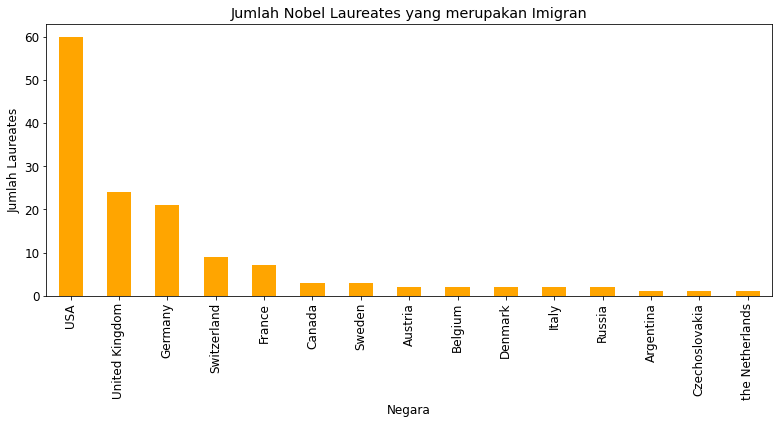

In [140]:
ctries = lr.groupby('country').size().sort_values(ascending=False).rename('Keseluruhan')
#imigran dicari dari perbedaan antara data negara yang diwakilkan dan data negara kelahiran tiap laureate
lr_imm = lr.loc[lr['bornCountry'] != lr['country']]
imm_cntry = lr_imm.groupby('country').size().sort_values(ascending=False).rename('Imigran')
imm_cntry.plot.bar(figsize=(13,5), color='orange')
plt.title('Jumlah Nobel Laureates yang merupakan Imigran'); plt.xlabel('Negara'); plt.ylabel('Jumlah Laureates')

Visualisasi perbandingan jumlah laureates yang pernah mendapat satu kali penghargaan & yang lebih dari sekali

Text(0, 0.5, 'Total Penghargaan')

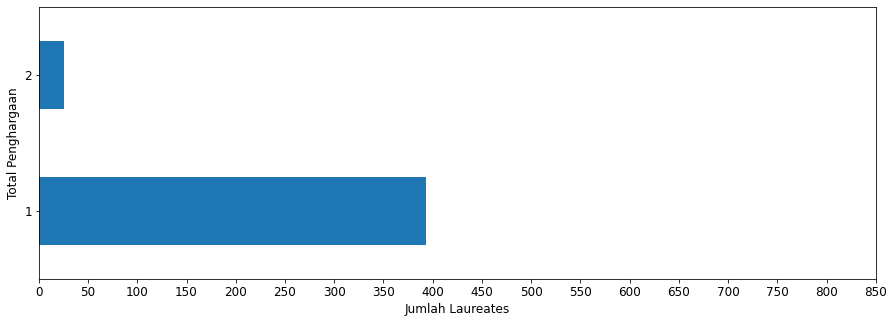

In [141]:
pog = lr[['firstname', 'surname']].value_counts()
pogdf = pog.to_frame().reset_index()
pogdf.rename(columns={0:'freq'}, inplace=True)
pogdf['freq'].value_counts().plot.barh(figsize=(15,5), xticks=range(0,900,50))
plt.xlabel('Jumlah Laureates'); plt.ylabel('Total Penghargaan')

Visualisasi perubahan jumlah laureates berdasarkan gender terhadap waktu

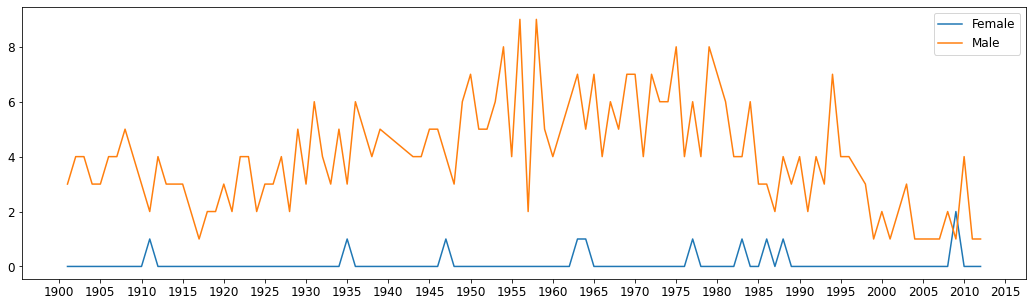

In [142]:
female = lr.loc[lr['gender'] == 'female'][['year']]
female = female['year'].value_counts().sort_index(ascending=True).rename('Female')
male = lr.loc[lr['gender'] == 'male'][['year']]
male = male['year'].value_counts().sort_index(ascending=True).rename('Male')
df = pd.concat([female, male], axis=1).fillna(0)
df.plot(figsize=(18,5), xticks=range(1900,2020,5))
plt.legend(['Female', 'Male'])

Visualisasi Hubungan Keseluruhan-Bagian antara jumlah imigran & native dari jumlah keseluruhan Nobel Laureates

Text(0, 0.5, 'Jumlah Laureates')

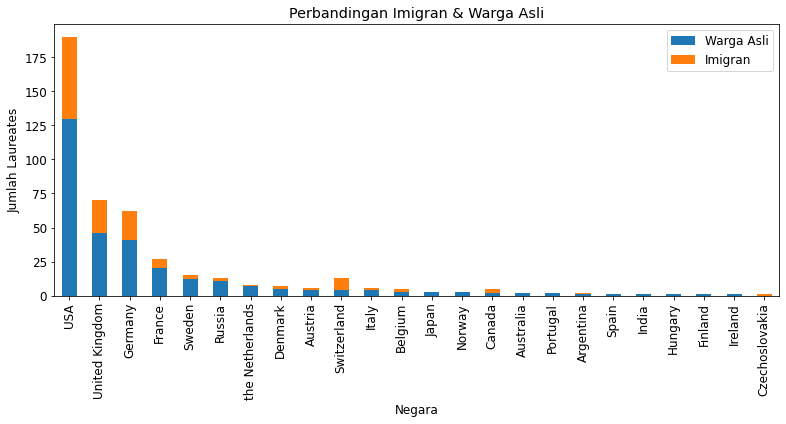

In [143]:
lr_noimm = lr.loc[lr['bornCountry'] == lr['country']]
noimm_cntry = lr_noimm.groupby('country').size().sort_values(ascending=False).rename('Warga Asli')
df = pd.concat([noimm_cntry, imm_cntry], axis=1)
df.plot.bar(figsize=(13,5), stacked=True)
plt.title('Perbandingan Imigran & Warga Asli'); plt.xlabel('Negara'); plt.ylabel('Jumlah Laureates')

Visualisasi pembagian hadiah

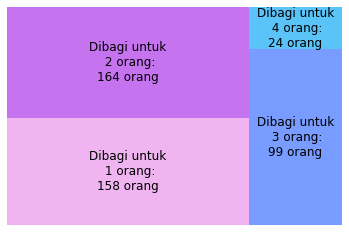

<Figure size 720x720 with 0 Axes>

In [144]:
import squarify

volume = lr.groupby('share').size()
labels = ['Dibagi untuk\n 1 orang:\n158 orang', 'Dibagi untuk\n 2 orang:\n164 orang',
          'Dibagi untuk\n 3 orang:\n99 orang', 'Dibagi untuk\n 4 orang:\n24 orang']
color_list = ['#EB96EB', '#AF38EB', '#4073FF',
              '#14AAF5']

plt.rc('font', size=12)
squarify.plot(sizes=volume, label=labels,
              color=color_list, alpha=0.7)
plt.axis('off')
plt.figure(figsize=(10,10))

plt.show()